In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import f1_score,classification_report,recall_score,auc,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

from scipy import stats
import statsmodels.api as sm

In [2]:
# Load the data

data_df = pd.read_csv("/content/Leads.csv")

data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of the dataframe
data_df.shape

(9240, 37)

In [4]:
# Check columns in the data_df
data_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Check the summary of the numerical columns of the dataframe
data_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the infomation about the column data types and null values in each column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
null_percentage = (data_df.isnull().mean() * 100).sort_values(ascending=False)
null_percentage

,0
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199


#### We remove null values with the threshold of 35%.

In [8]:
columns = null_percentage[null_percentage > 35].index
data_df.drop(columns, axis=1, inplace=True)

In [9]:
null_percentage = (data_df.isnull().mean() * 100).sort_values(ascending=False)
null_percentage

,0
What matters most to you in choosing a course,29.318182
Lead Profile,29.318182
What is your current occupation,29.112554
Country,26.634199
How did you hear about X Education,23.885281
Specialization,15.562771
City,15.367965
Page Views Per Visit,1.482684
TotalVisits,1.482684
Last Activity,1.114719


In [10]:
# Check value counts for each column in the data_df

for col in data_df.columns:
  print(col)
  print(f"{data_df[col].value_counts()}")
  print("\n")

Prospect ID
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


Lead Number
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64


Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Lead Source
Lead Source
Google               2868
Direct Traff

### Based on this we can come to a conclusion at lead_number, city, country, Prospect ID, How did you hear about X Education",Lead Profile wont be helpful in the prediction. So we can drop these columns

In [11]:
data_df.drop(["City", "Country", "Lead Number","Prospect ID","How did you hear about X Education","Prospect ID","Lead Profile"], axis=1, inplace=True)

In [12]:
data_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
data_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)


In [14]:
null_percentage = (data_df.isnull().mean() * 100).sort_values(ascending=False)
null_percentage

,0
What is your current occupation,29.112554
Specialization,15.562771
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Lead Origin,0.000000
Do Not Email,0.000000
Converted,0.000000
Total Time Spent on Website,0.000000


In [15]:
# What is your current occupation,Lead Source,Specialization and TotalVisits columns have many null values but it is very importtant in analysis so we just drop the null value rows

data_df = data_df[~pd.isnull(data_df['What is your current occupation'])]
data_df = data_df[~pd.isnull(data_df['TotalVisits'])]
data_df = data_df[~pd.isnull(data_df['Lead Source'])]
data_df = data_df[~pd.isnull(data_df['Specialization'])]


In [16]:
null_percentage = (data_df.isnull().mean() * 100).sort_values(ascending=False)
null_percentage

,0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0
Last Activity,0.0
Specialization,0.0
What is your current occupation,0.0


In [17]:
# checking the shape of data_df again. This is the final data we are working with
data_df.shape

(6373, 12)

### Checking the outliers in hte numerical columns

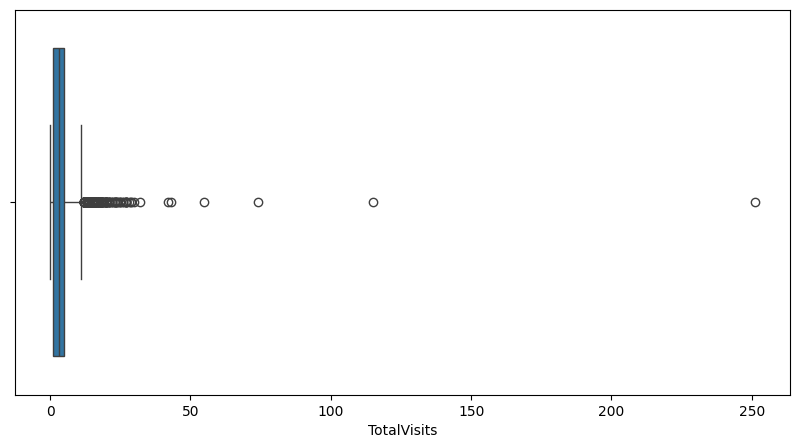

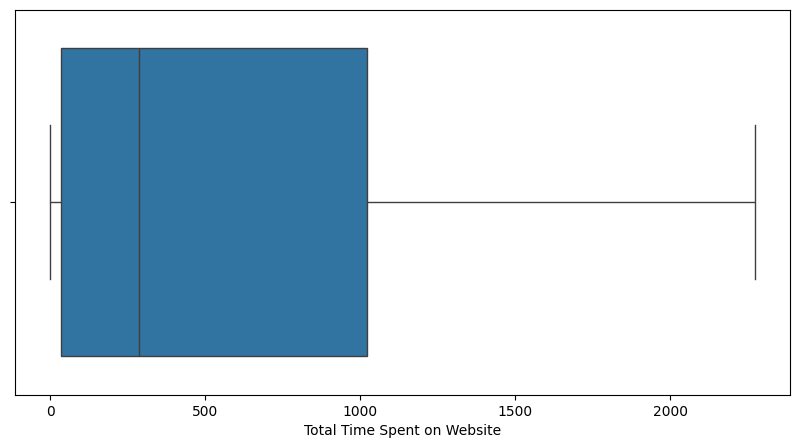

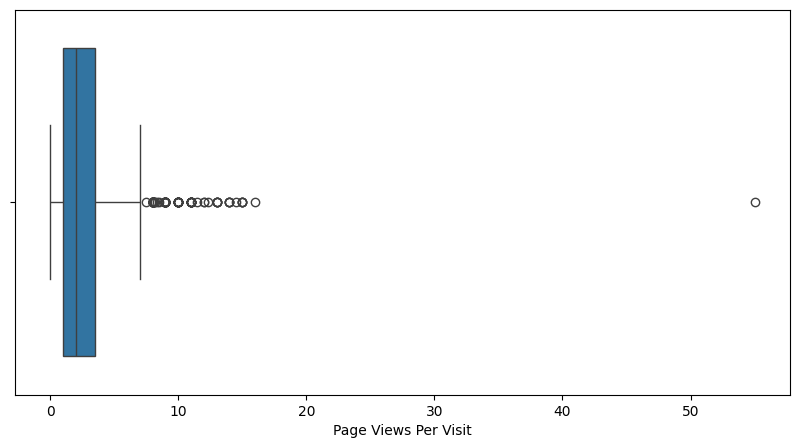

In [18]:
number_cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

for i in number_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=data_df[i])
  plt.show()

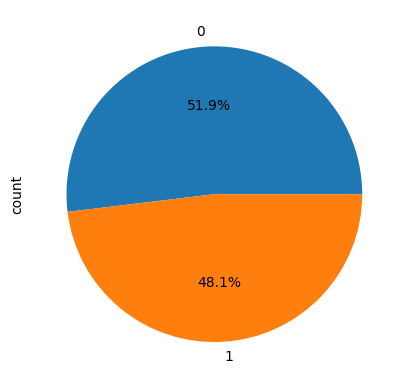

In [19]:
# Check teh class imbalance
target_counts =data_df['Converted'].value_counts().plot.pie(autopct='%1.1f%%')
## Observation - We can say that data is fairly balanced

### Caregorical column Analysis

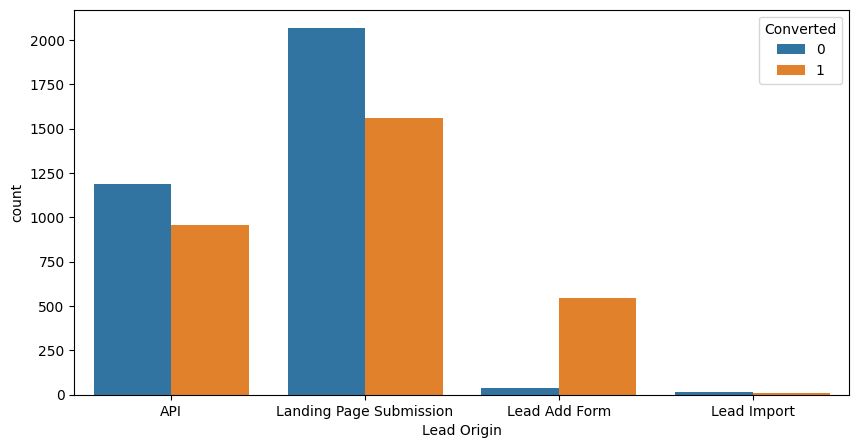

In [20]:
  # Analyze the target based on Lead Origin feature
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Origin', hue='Converted', data=data_df)
plt.show()

In [21]:
data_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

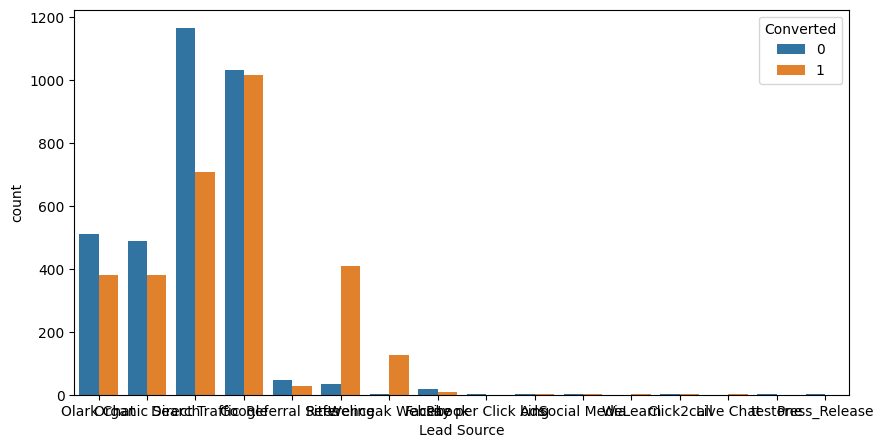

In [22]:
  # Analyze the target based on Lead Source feature
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Source', hue='Converted', data=data_df)
plt.show()

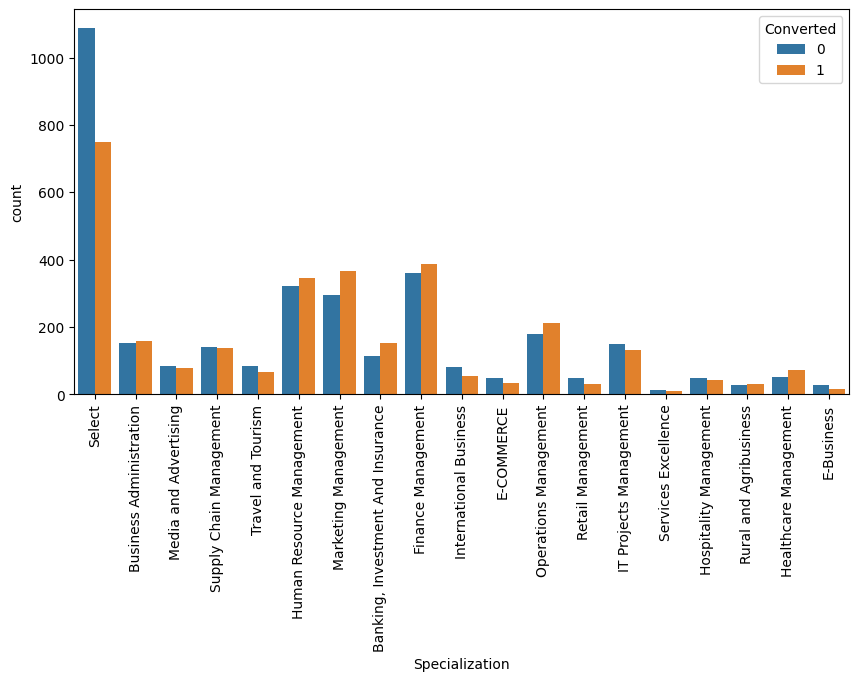

In [23]:
 # Analyze the target based on Specialization feature
plt.figure(figsize=(10,5))
sns.countplot(x='Specialization', hue='Converted', data=data_df)
plt.xticks(rotation=90)
plt.show()

### Next we will get the dummy variables for categorical columns

In [24]:

dummy = pd.get_dummies(data_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)
data_df = pd.concat([data_df, dummy], axis=1)

In [25]:
data_df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,...,False,False,False,True,False,False,False,False,False,False
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,...,True,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,True,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,False,False,False,True,False,False,False,False,False,False
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,...,False,False,False,True,False,False,False,False,False,False
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,...,False,False,False,False,False,False,False,False,False,False
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,False,False,False,False,False,False,True,False,False,False


In [26]:
dummy_spl = pd.get_dummies(data_df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
data_df = pd.concat([data_df, dummy_spl], axis = 1)

In [27]:
data_df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,...,False,False,False,False,False,False,False,False,False,False
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,...,False,False,False,True,False,False,False,False,False,False
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,...,False,False,False,False,False,False,False,False,False,False
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,...,True,False,False,False,False,False,False,False,False,False
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,False,False,False,True,False,False,False,False,False,False
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,False,False,False,False,False,False,False,False,False,False


In [28]:
## Now dropping the original columns

data_df = data_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [29]:
data_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Creating saperate df for features and target

y = data_df.pop('Converted')
X = data_df

In [31]:
# Splitting the dataset in to train and test dataset with 70:30 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
# Check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


Scaling the Features

In [33]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Data Modelling

In [34]:
# Recursive feature elimination

lm = LogisticRegression()
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 34),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 21),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [35]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [36]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [37]:
for column in X_train.select_dtypes(include=['bool']).columns:
    X_train[column] = X_train[column].astype(int)

<ipython-input-37-1e2144aa366f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = X_train[column].astype(int)
<ipython-input-37-1e2144aa366f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = X_train[column].astype(int)
<ipython-input-37-1e2144aa366f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [38]:
# Convert relevant columns to numeric types

X_train_sm = sm.add_constant(X_train)
lr1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
sum1 = lr1.fit()
sum1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 16 Mar 2025   Deviance:                       4145.5
Time:                        03:33:07   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [39]:
calculateVIF(X_train)

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [40]:
# Column "Lead Source_Reference" has higgh vif as well as high p value, lets drop it
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [41]:
# Second iteration to fit regressor

lr2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
sum2 = lr2.fit()
sum2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sun, 16 Mar 2025   Deviance:                       4146.5
Time:                        03:33:08   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [42]:
calculateVIF(X_train)

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


* All the vif values are less than 5. Noe lets drop columns with high p value.

In [43]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [44]:
X_train_sm_3 = sm.add_constant(X_train)

lr3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
sum3 = lr3.fit()
sum3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Sun, 16 Mar 2025   Deviance:                       4152.2
Time:                        03:33:09   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [45]:
# "What is your current occupation_Housewife" column has high p_value. lets drop it.

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [46]:
X_train_sm_4 = sm.add_constant(X_train)

lr4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
sum4 = lr4.fit()
sum4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sun, 16 Mar 2025   Deviance:                       4156.7
Time:                        03:33:09   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [47]:
# "What is your current occupation_Working Professional" has high p value. Lets drop it.

X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [48]:
X_train_sm_5 = sm.add_constant(X_train)

lr5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
sum5 = lr5.fit()
sum5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sun, 16 Mar 2025   Deviance:                       4158.1
Time:                        03:33:09   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [49]:
calculateVIF(X_train)

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


* We have met the desired condition where all the p-values are in acceptable range and VIF less than 5.

In [50]:
# Making Prediction

y_pred = sum5.predict(sm.add_constant(X_train))
y_pred

,0
8003,0.300117
218,0.142002
4171,0.127629
4037,0.291558
3660,0.954795
...,...
8759,0.954795
100,0.759334
5877,0.909280
8658,0.208249


In [51]:
# With the threshold of 0.5 lets convert these values into labels

y_pred_labels = np.where(y_pred > 0.5, 1, 0)
y_pred_labels

array([0, 0, 0, ..., 1, 0, 0])

### Model Evaluation

In [52]:
# Lets build the confusion matrix for the train set predictions

confusion_matrix(y_train, y_pred_labels)

array([[1929,  383],
       [ 560, 1589]])

In [53]:
# calculate accuracy

accuracy_score(y_train, y_pred_labels)

0.7886124187401928

### Make predictions on the test set

In [54]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [55]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional',
                     'Last Notable Activity_Had a Phone Conversation'], axis = 1,
                                inplace = True)

In [56]:
X_test_ = X_test[X_train.columns]

In [57]:
X_test_.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,True,False,False,False,False,True,False,False,False
6122,0.027888,0.029049,False,False,False,False,False,False,False,True,False
9202,0.015936,0.416813,False,False,False,False,False,True,False,True,False
6570,0.011952,0.378961,False,False,False,True,False,True,False,True,False
2668,0.031873,0.395246,False,False,False,False,False,True,False,True,False


In [58]:
for column in X_test_.select_dtypes(include=['bool']).columns:
    X_test_[column] = X_test_[column].astype(int)

<ipython-input-58-3f91dd560b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_[column] = X_test_[column].astype(int)
<ipython-input-58-3f91dd560b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_[column] = X_test_[column].astype(int)
<ipython-input-58-3f91dd560b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [59]:
y_test_pred_test = sum5.predict(sm.add_constant(X_test_))

In [60]:
# caculate confusion matrix for test set

confusion_matrix(y_test, np.where(y_test_pred_test > 0.5, 1, 0))

array([[828, 168],
       [249, 667]])

In [61]:
# Calculate accuracy for test set

accuracy_score(y_test, np.where(y_test_pred_test > 0.5, 1, 0))

0.7819037656903766

* As we can see the accuracy score for train and test set are very close. so the model is performing well on train as well as test dataset.

### Findng the optimal cut off

* Now, we need to find the optimal cut off for the probability values. By default we have considered it to be 0.5

In [62]:
def find_optimal_threshold(y_true, y_pred_probs):
    # Compute ROC curve
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_probs)

    # Compute Youden's J statistic
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold_roc = thresholds_roc[optimal_idx]

    # Compute Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_pred_probs)

    # Compute F1-score for each threshold
    f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)
    optimal_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

    print(f"Optimal Threshold (ROC): {optimal_threshold_roc:.4f}")
    print(f"Optimal Threshold (Precision-Recall, F1): {optimal_threshold_pr:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, label=f"AUC: {auc(fpr, tpr):.4f}")
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Optimal Threshold')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Plot Precision-Recall Curve
    plt.subplot(1,2,2)
    plt.plot(recall, precision, label="Precision-Recall Curve")
    plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], marker='o', color='red', label='Optimal F1 Threshold')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.show()

    return optimal_threshold_roc, optimal_threshold_pr

Optimal Threshold (ROC): 0.4391
Optimal Threshold (Precision-Recall, F1): 0.4072


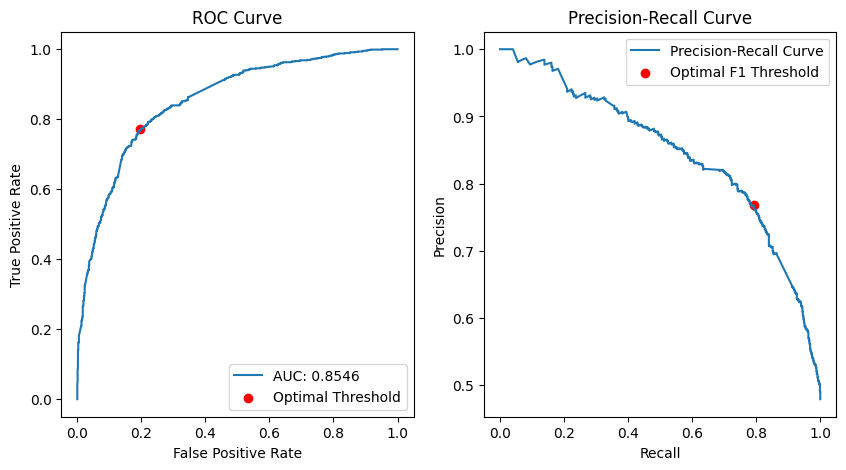

In [63]:
optimal_threshold_roc, optimal_threshold_pr = find_optimal_threshold(y_test, y_test_pred_test)

In [64]:
y_test_pred = (y_test_pred_test >= optimal_threshold_roc).astype(int)

In [65]:
y_test_pred

,0
4771,1
6122,0
9202,1
6570,0
2668,1
...,...
5828,0
6583,0
5531,1
3056,0


In [66]:
## Evaluating Model on these predictions

print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")

Test Set Performance:
Accuracy: 0.7882
Precision: 0.7836
Recall: 0.7707
F1 Score: 0.7771
